In [ ]:
"""
Purpose: To be able and tell when theh branching activity
does not have a large angle between the sides and they run alongside each other

- this will be ignored for the very thick apical

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 08:27:01,249 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:27:01,252 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:27:01,253 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:27:01,257 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 08:27:01,258 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:27:01,273 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 08:27:01,713 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:27:01,716 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:27:01,717 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:27:01,718 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:27:01,719 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:27:01,720 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:27:01,721 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:27:01,724 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:27:02,190 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 08:27:02,349 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:27:02,351 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:27:02,352 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:27:02,356 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:27:02,868 - settings - Setting enable_python_native_blobs to True


In [9]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import validation_utils as vu

# Downloading the neuron

In [5]:
vu.old_to_new_segment_id(segment_id = 864691135564655959)

864691135724333739

In [6]:
segment_id = 864691136105498585 # worked for this segment
# segment_id = 864691135212632448 # dont think fork existed
# segment_id = 864691135564655959
minnie.Decomposition() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691136105498585,0,0.25,30.00,7,0,1,=BLOB=,332957,689602,0,0,0,0,1,6,62,39,4207536.831588222,1856257.3544398847,45864.626,85.841,85.841,276.001,272.655,272,6.464589874958456e-05,4.387096774193548,2604692.559,22,0.00010442691175208291,12.364,104312137661.36154,119065350.43993981,24791.734888268766,40047.7735082137,4741460802.789161,3808.4313


In [7]:
# neuron_objs,split_indexes = du.decomposition_with_spine_recalculation(segment_id=segment_id,)
#                                        #border_validation=False)
    
# neuron_obj = neuron_objs[0]

# import axon_utils as au
# neuron_obj_axon = au.complete_axon_processing(neuron_obj)
# neuron_obj_axon

neuron_obj = du.fetch_neuron_obj_manual(segment_id,
                                       border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [ ]:
nviz.plot_axon(neuron_obj_axon)

# Want to visualize the error mesh where might have forking

In [ ]:
neuron_obj_axon.segment_id

In [ ]:
nviz.visualize_neuron_specific_limb(neuron_obj_axon,
                                   neuron_obj.axon_limb_name)

In [ ]:
error_mesh = vu.error_mesh_from_manual_proofreading(neuron_obj_axon.segment_id,
                                                   plot_error_and_valid_mesh=False)

In [ ]:
nviz.plot_objects(error_mesh,
                  main_mesh_color="red",
                  mesh_alpha=1,
                 append_figure=True,
                 show_at_end=False)

In [ ]:
error_branches = vu.error_branches_from_old_new_segment_mesh(neuron_obj_axon,
                                           )[neuron_obj_axon.axon_limb_name]

In [ ]:
for b in error_branches:
    print(f"Branch {b}:")
    nviz.plot_branches_with_boutons(neuron_obj_axon[0][b])

In [ ]:
thin_fork_branch = 205

In [ ]:
nviz.visualize_neuron(neuron_obj_axon,
                      visualize_type=["skeleton","mesh"],
                     limb_branch_dict=dict(L0=[thin_fork_branch]),
                     mesh_whole_neuron=True)

In [ ]:
# neuron_obj_axon.save_compressed_neuron("./",file_name=f"{neuron_obj.segment_id}_fork_test",
#                                        export_mesh=True)

# Examples of How to Run Fork Divergence

In [ ]:
# import numpy_utils as nu
# nu.turn_off_scientific_notation()
# nst.fork_divergence_from_skeletons(upstream_skeleton=limb_obj[289].skeleton,
#                     downstream_skeletons=[limb_obj[k].skeleton for k in [12, 290]],
#                                   verbose = False)

In [ ]:
# import neuron_statistics as nst
# # nst.fork_divergence(upstream_skeleton = upstream_sk,
# #                     downstream_skeletons = downstream_sk,
# #                     comparison_distance = 500,
# #                     skeletal_segment_size = 50,
# #                     plot_restrictions = True,
# #                     combining_function = np.mean)

# nst.fork_divergence_from_branch(branch_idx = 206,
#     limb_obj = neuron_obj_axon[neuron_obj_axon.axon_limb_name],
#     verbose = False,
#     plot_fork_skeleton = False,)

# Searching over the neuron object for fork divergences

In [ ]:
import neuron_searching as ns

two_downstream_limb_branch = ns.query_neuron(neuron_obj_axon,
               functions_list = ["n_siblings"],
               query = "n_siblings == 1",
               return_dataframe=False,
               limbs_to_process=[neuron_obj_axon.axon_limb_name])

fork_div_limb_branch = ns.query_neuron(neuron_obj_axon,
               functions_list = ["fork_divergence"],
               query = "fork_divergence < 165",
               return_dataframe=False,
                limb_branch_dict_restriction=two_downstream_limb_branch,
               limbs_to_process=[neuron_obj_axon.axon_limb_name])

"""
Maybe a good threshold is 160??


"""
fork_div_limb_branch

In [ ]:
nviz.visualize_neuron(neuron_obj_axon,
                     limb_branch_dict={neuron_obj_axon.axon_limb_name:[72,78]},
                     mesh_whole_neuron=True)

# Building the Edit Rule that we can now apply to hopefully achieve higher results

# -- A) Building the Function that will apply new rule

In [ ]:
import error_detection as ed
ed.axon_fork_divergence_errors_limb_branch_dict(neuron_obj = neuron_obj_axon,
    divergence_threshold_mean = 160,
    verbose = True,
)

# -- B) Applying the Proofreading Rules (without the new addition) and measure performance

In [ ]:
(base_filt_neuron,
 return_synapse_df,
return_validation_df) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.get_exc_filters_high_fidelity_axon_postprocessing(),
                        verbose = True,
                                                 plot_score=False)

In [ ]:
vu.synapse_validation_df_to_score_plot(return_validation_df)

# Plot to see the synapses that were not included

In [ ]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = base_filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

# -- C) Apply the proofreading rules (with addition) and measure perfromance

In [10]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=False)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': inf, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}


limb_branch_dict_to_cancel = {'L0': array([220, 223, 225, 226, 254, 247, 257, 258, 259, 251, 150, 151, 153,
       149, 276, 278, 169, 170, 174, 175,  57,  64,  80,  81, 103, 104,
       122, 123, 130, 129])}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000}


limb_branch_dict_to_cancel = {'L1': [1]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 4:
function = axon_fork_divergence
function __name__ = filter_away_small_axon_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {'L0': array([ 68,  71, 168, 170])}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh





 ---- Total time for applying filter: 151.89027762413025 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 214, # error synapses  = 67, # error presyns = 42
For postsyn: # valid synapses = 812, # error synapses  = 66, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 214
n_errored_syn_ids_presyn = 67
n_valid_syn_ids_postsyn = 812
n_errored_syn_ids_postsyn = 66

--- Finished Part 3: Generating Validation Dataframe -----


Segment Id = 864691136105498585
Postsyn counts:
TP:805
TN:0
FP:7
FN:66
Presyn counts:
TP:210
TN:0
FP:4
FN:25


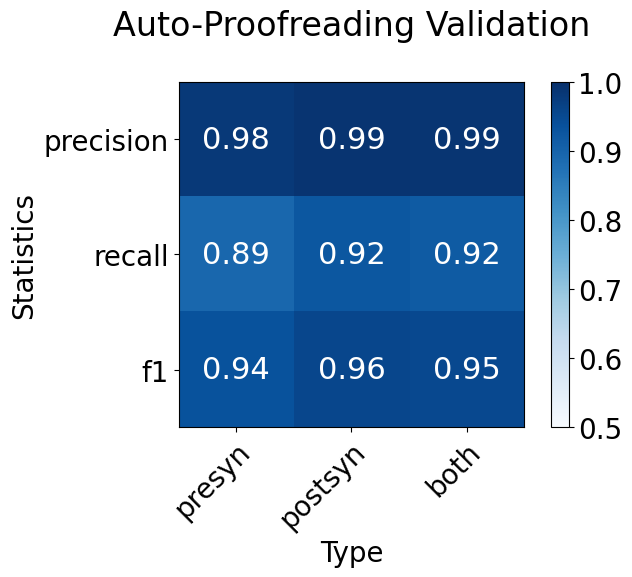

In [11]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [12]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = base_filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

NameError: name 'base_filt_neuron' is not defined

In [14]:
import system_utils as su
su.compressed_pickle(return_validation_df_revised,"example_df")

Saved object at /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_4/example_df.pbz2
File size is 0.024535 MB


In [15]:
su.decompress_pickle("example_df")

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,104776252,presyn,True,587224,896760,851440,False,FP,864691136105498585,864691135462463389,141306.595039
1,113727235,presyn,True,588280,896056,851400,False,FP,864691136105498585,864691135462463389,140166.167602
2,113729461,presyn,True,602896,888784,854480,False,FP,864691136105498585,864691135462463389,126905.700773
3,114063971,presyn,True,603504,929464,825200,True,TP,864691136105498585,864691135462463389,133223.914628
4,116415948,presyn,True,617744,908040,923520,True,TP,864691136105498585,864691135462463389,166236.202746
...,...,...,...,...,...,...,...,...,...,...,...
1112,155937233,postsyn,False,685528,876652,986920,True,FN,864691136105498585,864691135462463389,193801.981941
1113,155937293,postsyn,False,685808,873920,989760,True,FN,864691136105498585,864691135462463389,196294.043252
1114,155937318,postsyn,False,685952,877416,987640,True,FN,864691136105498585,864691135462463389,194541.703784
1115,155937451,postsyn,False,686768,873568,992200,True,FN,864691136105498585,864691135462463389,198555.456960
